In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1, 1, 1, 1, 1,
               1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 
               0, 5, 10, 1, 2]])

In [3]:
X

array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  1,  2,  1,  3,  0,  5, 10,  1,  2]])

In [4]:
X.shape

(2, 10)

In [5]:
y = [45, 55, 50, 59, 65,
    35, 75, 80, 50, 60]

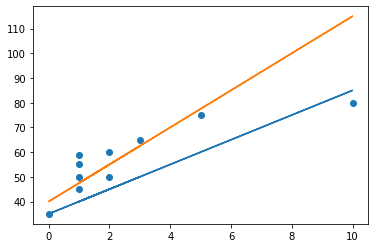

In [6]:
plt.scatter(X[1], y)
plt.plot(X[1], 35*np.ones(10) + X[1]*5)
plt.plot(X[1], 40*np.ones(10) + X[1]*7.5)

In [8]:
y_pred1 = 35 + X[1]*5
y_pred2 = 40 + X[1]*7.5

In [9]:
y_pred2

array([ 47.5,  47.5,  55. ,  47.5,  62.5,  40. ,  77.5, 115. ,  47.5,
        55. ])

In [10]:
err1 = np.sum(y - y_pred1)
err2 = np.sum(y - y_pred2)

In [11]:
err1, err2

(94, -21.0)

In [12]:
mae_1 = np.sum(np.abs(y - y_pred1)) / 10
mae_2 = np.sum(np.abs(y - y_pred2)) / 10

In [13]:
mae_1, mae_2

(10.4, 7.9)

In [14]:
mse_1 = np.mean((y - y_pred1)**2)
mse_2 = np.mean((y - y_pred2)**2)

In [15]:
mse_1, mse_2

(143.6, 151.35)

Метод наименьших квадратов

In [16]:
X.shape

(2, 10)

In [17]:
X.T.shape

(10, 2)

In [18]:
W = np.linalg.inv(np.dot(X, X.T)) @ X @ y
W

array([47.23214286,  3.91071429])

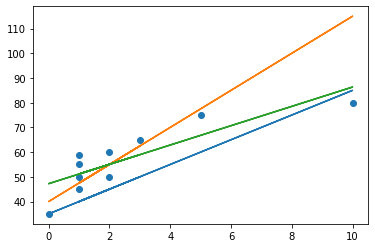

In [19]:
plt.scatter(X[1], y)
plt.plot(X[1], 35*np.ones(10) + X[1]*5)
plt.plot(X[1], 40*np.ones(10) + X[1]*7.5)
plt.plot(X[1], W[0] + W[1] * X[1])

In [20]:
def calc_mse(y, y_pred):
  err = np.mean((y - y_pred)**2)
  return err

In [21]:
calc_mse(y, y_pred1)

143.6

In [22]:
def calc_mae(y, y_pred):
  err = np.mean(np.abs(y - y_pred))
  return err

In [23]:
calc_mae(y, y_pred1)

10.4

In [24]:
y_pred3 = W[0] + W[1] * X[1]
y_pred3

array([51.14285714, 51.14285714, 55.05357143, 51.14285714, 58.96428571,
       47.23214286, 66.78571429, 86.33928571, 51.14285714, 55.05357143])

In [25]:
calc_mse(y, y_pred3)

45.93749999999999

In [26]:
calc_mae(y, y_pred3)

6.182142857142858

Градиентный спуск

In [42]:
n = 10
f = 1/n * np.sum((y_pred3 - y)**2)
alpha = 0.01

In [43]:
g = alpha * (1/n * 2 * np.sum(X[0] * (W[0] * X[0] - y)))

In [44]:
W[0] - g


47.43549999999998

---

# Домашнее задание

1. Подберите скорость обучения (alpha) и количество итераций:

In [45]:
X

array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  1,  2,  1,  3,  0,  5, 10,  1,  2]])

In [66]:
n = X.shape[1]
alpha = 1e-4
W = np.array([1, 0.5])
W, alpha

(array([1. , 0.5]), 0.0001)

In [86]:
n = X.shape[1]
alpha = 5e-2
W = np.array([1, 0.5])
W, alpha

for i in range(600):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    for ii in range(W.shape[0]):
        W[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))
    if i % 100 == 0:
        print(i, W, err)

0 [ 6.51 17.5 ] 3173.15
100 [47.03142979  3.94777749] 45.96159894380851
200 [47.23117922  3.91089223] 45.93750055548497
300 [47.23213823  3.91071514] 45.937500000012804
400 [47.23214283  3.91071429] 45.93749999999999
500 [47.23214286  3.91071429] 45.9375


Скорость обучения alpha = 5e-2, количество итераций = 600

---

*2. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее:

In [87]:
n = X.shape[1]
alpha = 5e-2
W = np.array([1, 0.5])
W, alpha
for i in range(600):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    '''for ii in range(W.shape[0]):
    W[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))'''
    W -= (alpha * (1/n * 2 * np.sum(X * (y_pred - y), axis=1)))
    if i % 100 == 0:
        print(i, W, err)

0 [ 6.51 17.5 ] 3173.15
100 [47.03142979  3.94777749] 45.96159894380851
200 [47.23117922  3.91089223] 45.93750055548497
300 [47.23213823  3.91071514] 45.937500000012804
400 [47.23214283  3.91071429] 45.93749999999999
500 [47.23214286  3.91071429] 45.9375


К np.sum() нужно добавить направление суммирования axis=1

---

Задание *3: вместо того, чтобы задавать количество итераций, задайте условие остановки алгоритма - когда ошибка за итерацию
начинает изменяться ниже определенного порога (упрощенный аналог параметра tol в линейной регрессии в sklearn).

Вариант 1: остановка по разнице ошибок

In [128]:
n = X.shape[1]
alpha = 5e-2
W = np.array([1, 0.5])
W, alpha
err = float('Inf')
while True:
    y_pred = np.dot(W, X)
    new_err = calc_mse(y, y_pred)
    if err - new_err == 0:
        W -= (alpha * (1/n * 2 * np.sum(X * (y_pred - y), axis=1)))
        break
    else:    
        err = calc_mse(y, y_pred)
        W -= (alpha * (1/n * 2 * np.sum(X * (y_pred - y), axis=1)))

print(W, err)


[47.2321426   3.91071433] 45.93750000000004


Вариант 2: остановка по разнице коэффициентов

In [193]:
alpha = 5e-2
W = np.array([1, 0.5])
new_W = W.copy()
stop_dif = 1e-10

while True:
    y_pred = np.dot(W, X)
    new_W = W - (alpha * (1/n * 2 * np.sum(X * (y_pred - y), axis=1)))
    
    if np.all(np.abs(new_W - W) <= [stop_dif]*X.shape[0]):
        err = calc_mse(y, y_pred)
        break
    else:    
        W = new_W

print(W, err)

[47.23214286  3.91071429] 45.93750000000001
